In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [39]:
def cripto(cripto):
    moneda = cg.get_coin_market_chart_range_by_id(cripto, 'usd', '1577761200', '1691798400')
    moneda = pd.DataFrame(moneda)
    columns_to_drop = ['market_caps','total_volumes']
    moneda.drop(columns=columns_to_drop, axis=1, inplace=True)
    moneda[['date', 'price']] = pd.DataFrame(moneda['prices'].tolist(), columns=['date', 'price'])
    moneda = moneda.drop(columns=['prices'])
    moneda['date'] = pd.to_datetime(moneda['date'], unit='ms')
    nombre_archivo = f'datos_csv/{cripto}_coin.csv'
    moneda.to_csv(nombre_archivo, index=False)
    return moneda

# Para mi Análisis Exploratorio de Datos (EDA), utilizaré Bitcoin, ya que es la criptomoneda más grande en términos de capitalización de mercado.

In [38]:
bitcoin = cripto('bitcoin')

## El gráfico muestra que los mayores picos en cuanto a precio fueron en el año 2021.

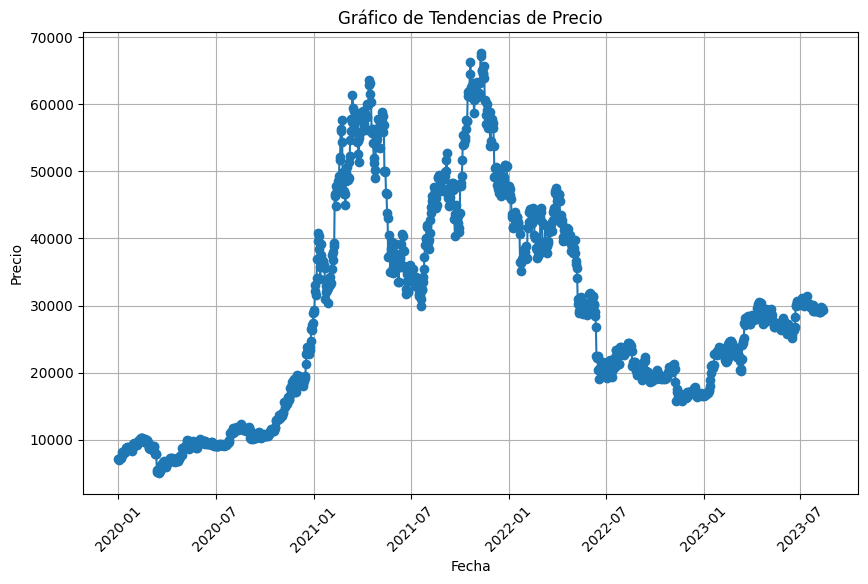

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin['date'], bitcoin['price'], marker='o')
plt.title('Gráfico de Tendencias de Precio')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Hay una ausencia de valores nulos y duplicados, habla de una buena calidad del dato.

In [19]:
duplicados = bitcoin.duplicated().sum()
nulos = bitcoin.isnull().sum()
duplicados
nulos

date     0
price    0
dtype: int64

## Las criptomonedas son conocidas por su alta volatilidad, por lo que considerar automáticamente los picos como outliers podría introducir un sesgo en el análisis.

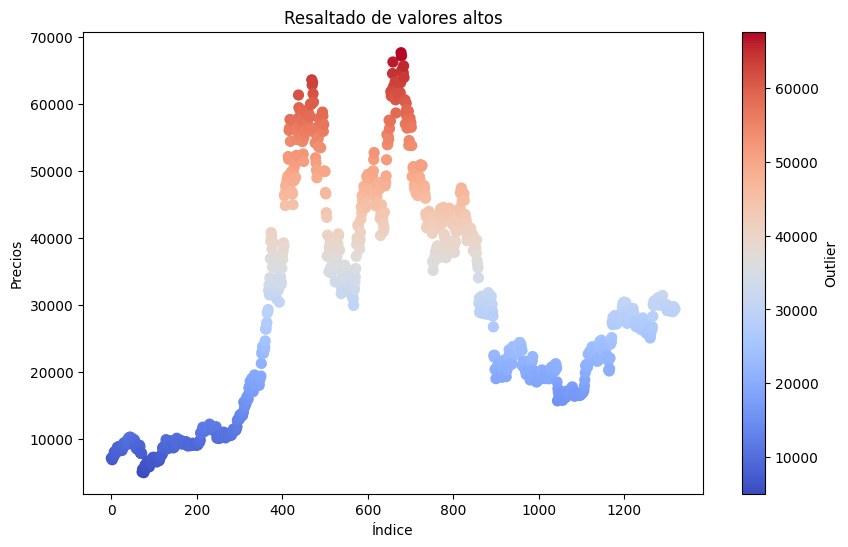

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(bitcoin.index, bitcoin['price'], c=bitcoin['price'], cmap='coolwarm', marker='o', s=50)
plt.title('Resaltado de valores altos')
plt.xlabel('Índice')
plt.ylabel('Precios')
plt.colorbar(label='Outlier')
plt.show()